In [52]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
import re

In [34]:
# Import the LabMT wordlist
df = pd.read_csv("Data_Set_S1.txt", sep="\t") 
# sep='' in the context of a function call sets the named argument sep to an empty string. 
df.head()
# Show the first 5 rows of the dataframe, it looks good

,word,happiness_rank,happiness_average,happiness_standard_deviation,twitter_rank,google_rank,nyt_rank,lyrics_rank
0,laughter,1,8.50,0.9313,3600,--,--,1728
1,happiness,2,8.44,0.9723,1853,2458,--,1230
2,love,3,8.42,1.1082,25,317,328,23
3,happy,4,8.30,0.9949,65,1372,1313,375
4,laughed,5,8.26,1.1572,3334,3542,--,2332


In [44]:
# Get the happiness dictionary
happiness_dict = dict(zip(df['word'],df['happiness_average']))
happiness_dict

{'laughter': 8.5,
 'happiness': 8.44,
 'love': 8.42,
 'happy': 8.3,
 'laughed': 8.26,
 'laugh': 8.22,
 'laughing': 8.2,
 'excellent': 8.18,
 'laughs': 8.18,
 'joy': 8.16,
 'successful': 8.16,
 'win': 8.12,
 'rainbow': 8.1,
 'smile': 8.1,
 'won': 8.1,
 'pleasure': 8.08,
 'smiled': 8.08,
 'rainbows': 8.06,
 'winning': 8.04,
 'celebration': 8.02,
 'enjoyed': 8.02,
 'healthy': 8.02,
 'music': 8.02,
 'celebrating': 8.0,
 'congratulations': 8.0,
 'weekend': 8.0,
 'celebrate': 7.98,
 'comedy': 7.98,
 'jokes': 7.98,
 'rich': 7.98,
 'victory': 7.98,
 'christmas': 7.96,
 'free': 7.96,
 'friendship': 7.96,
 'fun': 7.96,
 'holidays': 7.96,
 'loved': 7.96,
 'loves': 7.96,
 'loving': 7.96,
 'beach': 7.94,
 'hahaha': 7.94,
 'kissing': 7.94,
 'sunshine': 7.94,
 'beautiful': 7.92,
 'delicious': 7.92,
 'friends': 7.92,
 'funny': 7.92,
 'outstanding': 7.92,
 'paradise': 7.92,
 'sweetest': 7.92,
 'vacation': 7.92,
 'butterflies': 7.92,
 'freedom': 7.9,
 'flower': 7.88,
 'great': 7.88,
 'sunlight': 7.88,
 

In [211]:
# construct a function to calculate the sentiment value
def calculate_sentiment_value(file):
    with open(file, "r") as f: 
        a = f.read()
    f.close()
    b = re.split(r'\W+', a)
    c = [word.lower() for word in b if len(word) > 0] 
    
    score = 0
    changdu = len(c)
    for i in c:
        if i in happiness_dict:
            score = score + happiness_dict[i]
        else:
            changdu = changdu - 1
            continue
    if changdu == 0:
        return None
    sentiment_value = score/changdu
    return sentiment_value

    

In [212]:
sentiment_value_dc_list = []
sentiment_value_dc_list

[]

In [213]:
"D:/LEARNING/BA/2022.9-2022.12/Social graph/ASSIGNMENT 2/dc/Abby_Holland.txt"

'D:/LEARNING/BA/2022.9-2022.12/Social graph/ASSIGNMENT 2/dc/Abby_Holland.txt'

In [249]:
def findAllFile(base):
    for root, ds, fs in os.walk(base):
        for f in fs:
            if f.endswith('.txt'):
                fullname = os.path.join(root, f)
                yield fullname

def main():
    base = 'D:/LEARNING/BA/2022.9-2022.12/Social graph/ASSIGNMENT 2/dc'
    wenjianjia = []
    for i in findAllFile(base):
        wenjianjia.append(i)
    return wenjianjia


wenjianjia = main()



In [140]:
#calculate_sentiment_value("D:/LEARNING/BA/2022.9-2022.12/Social graph/ASSIGNMENT 2/dc/711_(Quality_Comics).txt")

In [250]:
#calculate_sentiment_value(wenjianjia[0])
for i in range(200):
    sentiment_value_dc_list.append(calculate_sentiment_value(wenjianjia[i]))

In [251]:
sentiment_value_dc_list

[None,
 None,
 5.389032815198586,
 5.285731064237726,
 5.40622464126665,
 5.529271600154953,
 5.389194229415914,
 5.4068993993993795,
 5.470350194552501,
 5.291917808219179,
 5.444045290787414,
 5.571974486966127,
 5.453398260869513,
 5.411169590643236,
 5.406216375997577,
 5.397945205479454,
 5.451735947238327,
 5.54126416739318,
 5.410853540252163,
 5.465056472632496,
 5.512528409090909,
 5.443552158273357,
 5.29987508796623,
 5.575493562231723,
 5.303140168400142,
 5.440507246376765,
 5.464334565619186,
 5.556300251256249,
 5.436537879462436,
 5.43869883934023,
 5.445366434591424,
 5.371116751269011,
 5.415151733064859,
 5.402253458277507,
 5.566179326099341,
 5.433901265371601,
 5.347444331983758,
 5.325638207945865,
 5.401266532167606,
 5.281621970087624,
 5.427582733812955,
 5.389527027026985,
 5.494579273693522,
 5.419370021723372,
 5.4972602739726035,
 5.29263236088604,
 5.2946753246753255,
 5.271016949152542,
 5.46295278969956,
 5.513258046301496,
 5.489685032461937,
 5.487012

In [252]:
def findAllFile2(base):
    for root, ds, fs in os.walk(base):
        for f in fs:
            if f.endswith('.txt'):
                fullname = os.path.join(root, f)
                yield fullname

def main():
    base = 'D:/LEARNING/BA/2022.9-2022.12/Social graph/ASSIGNMENT 2/marvel'
    wenjianjia2 = []
    for i in findAllFile2(base):
        wenjianjia2.append(i)
    return wenjianjia2


wenjianjia2 = main()


In [253]:
sentiment_value_marvel_list = []
sentiment_value_marvel_list

[]

In [254]:
for i in range(200):
    sentiment_value_marvel_list.append(calculate_sentiment_value(wenjianjia2[i]))

In [255]:
sentiment_value_marvel_list

[5.488878069432629,
 5.335026002971731,
 5.331379210220604,
 5.383867768594975,
 5.307005899704988,
 5.3297792408985005,
 5.425455588707747,
 5.397945205479454,
 5.460832514734795,
 5.452996655518379,
 5.529410774410753,
 5.3618174962292535,
 5.365564614757397,
 5.491509635974288,
 5.482098475967168,
 5.423991097922853,
 5.508325545171313,
 5.436228606356941,
 5.367058823529414,
 5.39698795180723,
 5.449441786283847,
 5.315432098765433,
 5.54424988168479,
 5.29498089171969,
 5.50313280363223,
 5.34334415584415,
 5.308399513776364,
 5.405606397156782,
 5.409565217391306,
 5.407313974591631,
 5.685624270711784,
 5.453112840466878,
 5.397945205479454,
 5.403826479438266,
 5.377171000788,
 5.462296431838954,
 5.3283582089552235,
 5.397945205479454,
 5.453467804499596,
 5.476338028169017,
 5.539505928853738,
 5.2810000000000015,
 5.417948094079447,
 5.4037305916911205,
 5.541724137931053,
 5.452173913043479,
 5.325113636363635,
 5.396925722145781,
 5.364631418403605,
 5.397945205479454,
 5.

In [258]:
merge_list = sentiment_value_dc_list + sentiment_value_marvel_list

In [259]:
merge_list

[None,
 None,
 5.389032815198586,
 5.285731064237726,
 5.40622464126665,
 5.529271600154953,
 5.389194229415914,
 5.4068993993993795,
 5.470350194552501,
 5.291917808219179,
 5.444045290787414,
 5.571974486966127,
 5.453398260869513,
 5.411169590643236,
 5.406216375997577,
 5.397945205479454,
 5.451735947238327,
 5.54126416739318,
 5.410853540252163,
 5.465056472632496,
 5.512528409090909,
 5.443552158273357,
 5.29987508796623,
 5.575493562231723,
 5.303140168400142,
 5.440507246376765,
 5.464334565619186,
 5.556300251256249,
 5.436537879462436,
 5.43869883934023,
 5.445366434591424,
 5.371116751269011,
 5.415151733064859,
 5.402253458277507,
 5.566179326099341,
 5.433901265371601,
 5.347444331983758,
 5.325638207945865,
 5.401266532167606,
 5.281621970087624,
 5.427582733812955,
 5.389527027026985,
 5.494579273693522,
 5.419370021723372,
 5.4972602739726035,
 5.29263236088604,
 5.2946753246753255,
 5.271016949152542,
 5.46295278969956,
 5.513258046301496,
 5.489685032461937,
 5.487012

In [262]:
cleaned_merge_list = []

In [263]:
for i in merge_list:
    if i != None:
        cleaned_merge_list.append(i)


In [264]:
cleaned_merge_list

[5.389032815198586,
 5.285731064237726,
 5.40622464126665,
 5.529271600154953,
 5.389194229415914,
 5.4068993993993795,
 5.470350194552501,
 5.291917808219179,
 5.444045290787414,
 5.571974486966127,
 5.453398260869513,
 5.411169590643236,
 5.406216375997577,
 5.397945205479454,
 5.451735947238327,
 5.54126416739318,
 5.410853540252163,
 5.465056472632496,
 5.512528409090909,
 5.443552158273357,
 5.29987508796623,
 5.575493562231723,
 5.303140168400142,
 5.440507246376765,
 5.464334565619186,
 5.556300251256249,
 5.436537879462436,
 5.43869883934023,
 5.445366434591424,
 5.371116751269011,
 5.415151733064859,
 5.402253458277507,
 5.566179326099341,
 5.433901265371601,
 5.347444331983758,
 5.325638207945865,
 5.401266532167606,
 5.281621970087624,
 5.427582733812955,
 5.389527027026985,
 5.494579273693522,
 5.419370021723372,
 5.4972602739726035,
 5.29263236088604,
 5.2946753246753255,
 5.271016949152542,
 5.46295278969956,
 5.513258046301496,
 5.489685032461937,
 5.487012464817192,
 5.

In [265]:
mean_value_sentiment = sum(cleaned_merge_list)/len(cleaned_merge_list)

In [266]:
mean_value_sentiment

5.404317197341668

In [271]:
qqq = np.array(cleaned_merge_list)

  
              
print(np.percentile(qqq, 10))

print(np.percentile(qqq, 90))

5.314961260418159
5.488773086440427


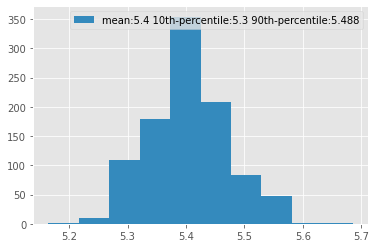

In [290]:

plt.hist(qqq)
plt.style.use('ggplot')
plt.hist(qqq,label = 'mean:5.4 10th-percentile:5.3 90th-percentile:5.488')
plt.legend()
plt.show()

In [291]:
goodorbad = pd.read_csv('D:/LEARNING/BA/2022.9-2022.12/Social graph/ASSIGNMENT 2/goodorbad.csv')

In [292]:
goodorbad.head()

,Unnamed: 0,CharacterName,WikiLink,universe,woman,man,good,bad
0,0,Abomination,Abomination (character),Marvel,0,1,0,1
1,1,Absorbing Man,Absorbing Man,Marvel,0,1,0,1
2,2,Achebe,Achebe (comics),Marvel,0,0,0,0
3,3,Agent,Agent (comics),Marvel,0,1,1,0
4,4,Agent X,Agent X (Marvel Comics),Marvel,0,1,1,0


In [296]:
goodorbad = goodorbad.drop(goodorbad.columns[[0]], axis = 1)

In [297]:
goodorbad

,CharacterName,WikiLink,universe,woman,man,good,bad
0,Abomination,Abomination (character),Marvel,0,1,0,1
1,Absorbing Man,Absorbing Man,Marvel,0,1,0,1
2,Achebe,Achebe (comics),Marvel,0,0,0,0
3,Agent,Agent (comics),Marvel,0,1,1,0
4,Agent X,Agent X (Marvel Comics),Marvel,0,1,1,0
...,...,...,...,...,...,...,...
2298,Xov,Xov (Action Comics 242),DC,0,0,0,0
2299,XS,XS (comics),DC,0,0,0,0
2300,4-D,International Ultramarine Corps#Founding membe...,DC,0,0,0,0
2301,500Z-Q,Hero Hotline#Support crew,DC,0,0,0,0


In [298]:
goodorbad.loc[goodorbad['good'] == 1]

,CharacterName,WikiLink,universe,woman,man,good,bad
3,Agent,Agent (comics),Marvel,0,1,1,0
4,Agent X,Agent X (Marvel Comics),Marvel,0,1,1,0
10,American Eagle,American Eagle (Marvel Comics),Marvel,0,1,1,0
12,Anarchist,X-Statix,Marvel,0,0,1,0
15,Angel,Angel (Thomas Halloway),Marvel,0,1,1,0
...,...,...,...,...,...,...,...
2245,Vibe,Vibe (comics),DC,0,1,1,0
2251,Viking Prince,Viking Prince,DC,0,1,1,0
2264,Vixen,Vixen (comics),DC,1,0,1,0
2295,Xiuhtecutli,Cadre (comics)#Cadre of the Immortal,DC,0,0,1,0


In [299]:
goodorbad.loc[goodorbad['bad'] == 1]

,CharacterName,WikiLink,universe,woman,man,good,bad
0,Abomination,Abomination (character),Marvel,0,1,0,1
1,Absorbing Man,Absorbing Man,Marvel,0,1,0,1
6,Air-Walker,Air-Walker,Marvel,0,1,0,1
17,Angela,Angela (comics),Marvel,1,0,0,1
21,Annihilus,Annihilus,Marvel,0,1,0,1
...,...,...,...,...,...,...,...
2211,Tony Zucco,Tony Zucco,DC,0,1,0,1
2223,Vandal Savage,Vandal Savage,DC,0,1,0,1
2243,Veronica Cale,Veronica Cale,DC,1,0,0,1
2267,Volcana,Volcana,DC,1,0,0,1


In [300]:
goodorbad.loc[goodorbad['bad'] == 1]['WikiLink']

0       Abomination (character)
1                 Absorbing Man
6                    Air-Walker
17              Angela (comics)
21                    Annihilus
                 ...           
2211                 Tony Zucco
2223              Vandal Savage
2243              Veronica Cale
2267                    Volcana
2280              Terrible Trio
Name: WikiLink, Length: 404, dtype: object

In [301]:
goodorbad.loc[goodorbad['good'] == 1]['WikiLink']

3                             Agent (comics)
4                    Agent X (Marvel Comics)
10            American Eagle (Marvel Comics)
12                                  X-Statix
15                   Angel (Thomas Halloway)
                        ...                 
2245                           Vibe (comics)
2251                           Viking Prince
2264                          Vixen (comics)
2295    Cadre (comics)#Cadre of the Immortal
2297                                   Xombi
Name: WikiLink, Length: 410, dtype: object

In [302]:
goodlist = goodorbad.loc[goodorbad['good'] == 1]['WikiLink']

In [305]:
badlist = goodorbad.loc[goodorbad['bad'] == 1]['WikiLink']

In [309]:
sentidictdc = {}
for i in wenjianjia:
    sentidictdc[i] = calculate_sentiment_value(i)

UnicodeDecodeError: 'gbk' codec can't decode byte 0x96 in position 39: illegal multibyte sequence